In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Load data

In [2]:
data  = pd.read_excel('../data/baraka_hygienics_2023-24.xlsx', sheet_name="Expenditure per year")
df = data.groupby('Years').apply(lambda x: pd.Series({'Cost':  x['Total'].sum(),
                                                      'Sales': x['Sales'].sum(),
                                                      'Profit': x['Profit'].sum()
                                                     }), 
                                 include_groups=False).reset_index().rename(columns ={'Years': 'Month'}); df

,Month,Cost,Sales,Profit
0,2023-06-01,35027.0,54350.0,19323.0
1,2023-07-01,48065.0,66417.0,18352.0
2,2023-08-01,18370.0,51712.0,33342.0
3,2023-09-01,37480.0,59582.0,22102.0
4,2023-10-01,23390.0,89290.0,65900.0
5,2023-11-01,24200.0,50590.0,26390.0
6,2023-12-01,13748.0,48415.0,34667.0
7,2024-01-01,16720.0,40837.0,24117.0
8,2024-02-01,23905.0,31339.0,7434.0
9,2024-03-01,24914.0,52790.0,27876.0


### Time-series

__Observations__

The dataset spans one year from June 2023 to June 2024.
Profit has significant variability, ranging from a loss of -6,023 to a high of 65,900.
Sales and cost also show considerable fluctuation, which may indicate seasonal impacts or market volatility.

In [3]:
df.set_index('Month', inplace=True)
df.describe()

,Cost,Sales,Profit
count,13.000000,13.000000,13.000000
mean,26390.923077,51747.615385,25356.692308
std,9380.798815,17267.954345,16383.775783
min,13748.000000,15850.000000,-6023.000000
25%,21873.000000,48415.000000,19323.000000
50%,24160.000000,52790.000000,26390.000000
75%,31230.000000,58537.000000,28850.000000
max,48065.000000,89290.000000,65900.000000


### Correlogram

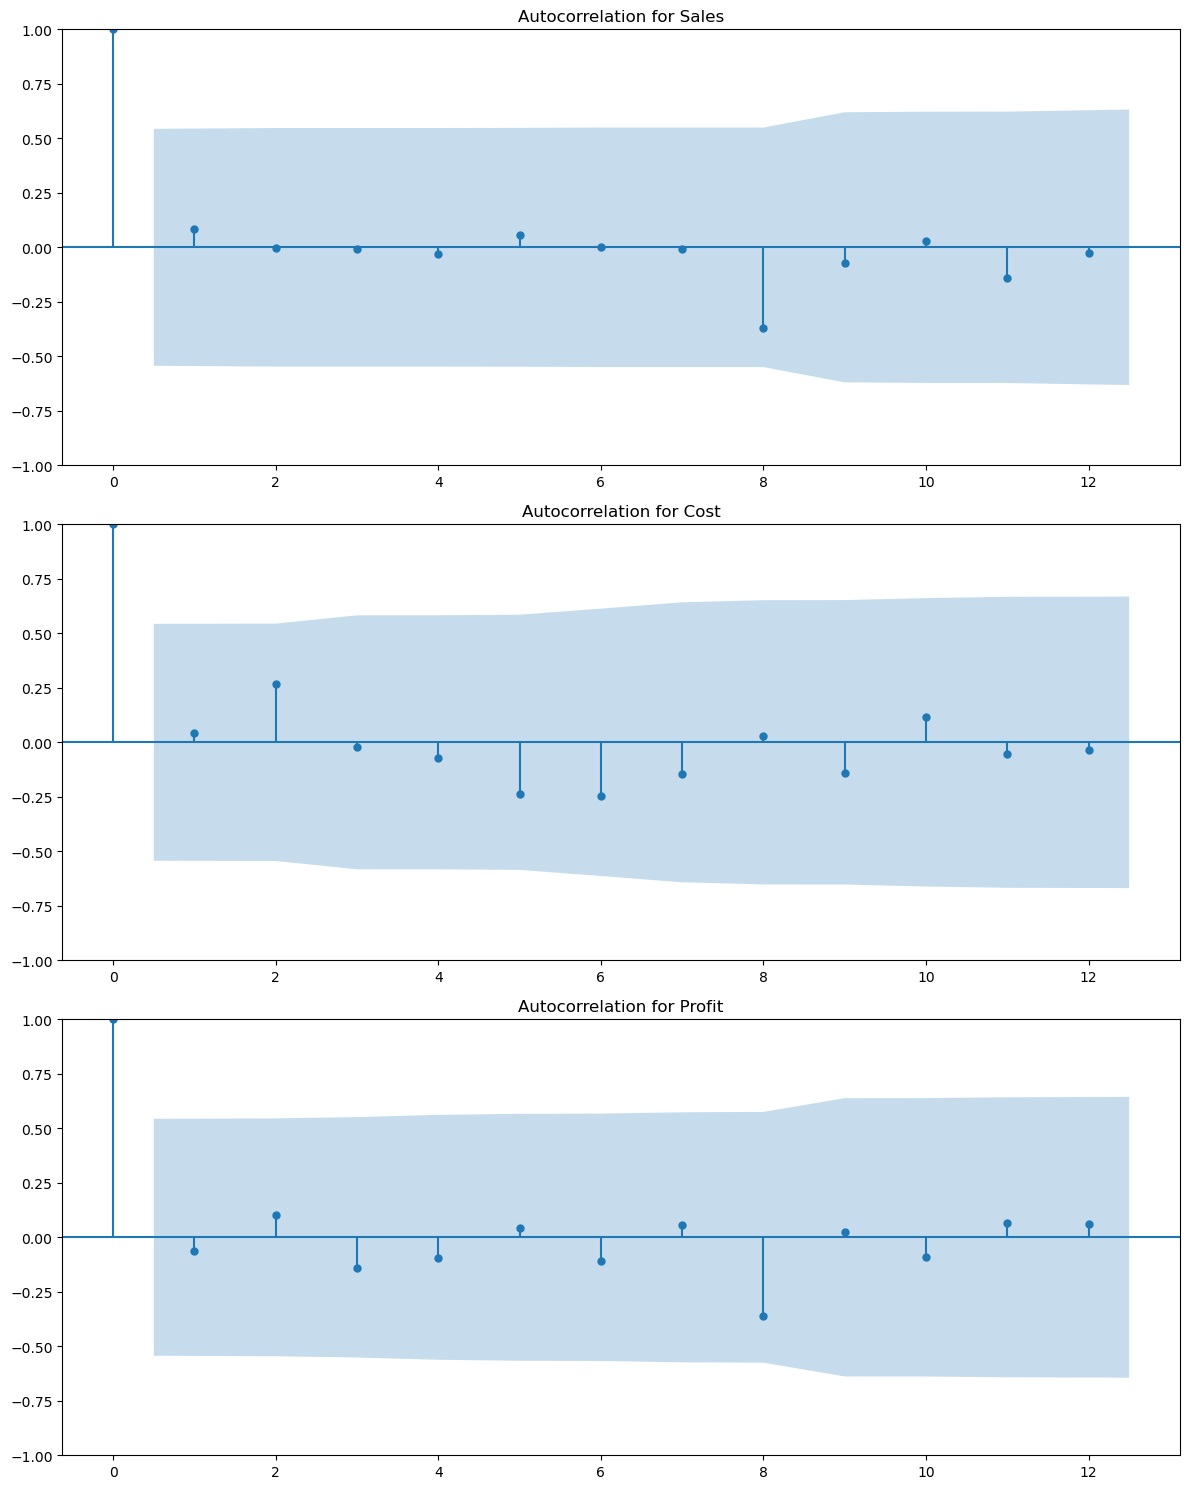

In [13]:
from statsmodels.graphics.tsaplots import plot_acf

# Plotting autocorrelation for Sales, Cost, and Profit
fig, ax = plt.subplots(3, 1, figsize=(12, 15))

plot_acf(df['Sales'], ax=ax[0], lags=12, title="Autocorrelation for Sales")
plot_acf(df['Cost'], ax=ax[1], lags=12, title="Autocorrelation for Cost")
plot_acf(df['Profit'], ax=ax[2], lags=12, title="Autocorrelation for Profit")

plt.tight_layout()
plt.show()



In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(12, 5))

plot_acf(df['Sales'], ax=ax, lags=12, title="Autocorrelation for Sales")

ax.set_title("Autocorrelation for Sales", fontsize=14)
ax.set_xlabel("Lags", fontsize=12)
ax.set_ylabel("Autocorrelation", fontsize=12)
ax.grid(True, linestyle='--', linewidth=0.2)


plt.tight_layout()
plt.show()